# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></div><div class="lev1 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></div><div class="lev1 toc-item"><a href="#Raw-KMeans" data-toc-modified-id="Raw-KMeans-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Raw KMeans</a></div><div class="lev2 toc-item"><a href="#Averaging" data-toc-modified-id="Averaging-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Averaging</a></div><div class="lev1 toc-item"><a href="#Testing-All-Columns-Combinations" data-toc-modified-id="Testing-All-Columns-Combinations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing All Columns Combinations</a></div><div class="lev1 toc-item"><a href="#Manual" data-toc-modified-id="Manual-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Manual</a></div><div class="lev2 toc-item"><a href="#Creating-Dataset" data-toc-modified-id="Creating-Dataset-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Creating Dataset</a></div><div class="lev2 toc-item"><a href="#Final-Result" data-toc-modified-id="Final-Result-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Final Result</a></div><div class="lev2 toc-item"><a href="#Evolution-of-Centroids" data-toc-modified-id="Evolution-of-Centroids-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Evolution of Centroids</a></div><div class="lev1 toc-item"><a href="#Compare-Manual-with-Sci-Kit-Learn" data-toc-modified-id="Compare-Manual-with-Sci-Kit-Learn-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Manual with Sci Kit Learn</a></div><div class="lev2 toc-item"><a href="#Comparing-Speed" data-toc-modified-id="Comparing-Speed-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Comparing Speed</a></div><div class="lev3 toc-item"><a href="#Sci-Kit-Learn" data-toc-modified-id="Sci-Kit-Learn-611"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Sci-Kit Learn</a></div><div class="lev3 toc-item"><a href="#Manual" data-toc-modified-id="Manual-612"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Manual</a></div><div class="lev2 toc-item"><a href="#Comparing-Accuracy" data-toc-modified-id="Comparing-Accuracy-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Comparing Accuracy</a></div>

# Initialization

In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import model_selection, preprocessing
from itertools import combinations, chain
from matplotlib import animation, rc
import matplotlib as mpl
from IPython.display import HTML
from collections import defaultdict
from random import shuffle
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9,9)
rc('animation', html='html5')

# Load Data

In [740]:
df = pd.read_excel('../data/titanic.xls')
df = df.fillna(0)

In [741]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,0,C,0,328.0,0
1305,3,0,"Zabour, Miss. Thamine",female,0.0,1,0,2665,14.4542,0,C,0,0.0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,0,C,0,304.0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,0,C,0,0.0,0
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,0,S,0,0.0,0


# Raw KMeans 

In [742]:
dropped_columns = ['name', 'survived', 'body', 'ticket', 'home.dest', 'cabin']

text_columns = [col for col in df.columns if df[col].dtype not in [np.int64, np.float64]]
dummy_columns = [col for col in text_columns if col not in dropped_columns]

In [743]:
X_df = df.drop(dropped_columns, 1)
X_df = pd.get_dummies(X_df, columns=dummy_columns, drop_first=True)

X = np.array(X_df).astype(float)
X = preprocessing.scale(X)

y = np.array(df['survived']).reshape(-1, 1)

In [749]:
def KMeans_process(X, y, call=KMeans):
    clf = call(n_clusters=2)
    clf.fit(X)
    correct = 0
    for x_i, y_i in zip(X, y):
        predict_me = np.array(x_i).reshape(1, -1)
        prediction = clf.predict(predict_me)
        if prediction == y_i:
            correct += 1
    acc = correct / len(X)
    return acc if acc > 0.5 else 1- acc

In [753]:
acc = KMeans_process(X, y)
print(f'One Shot Accuracy: {round(acc * 100, 2)}%')

One Shot Accuracy: 61.57%


## Averaging

In [747]:
total = 0
n = 10

for i in range(n):
    total += process(X, y)
    
print(f'Average Accuracy: {round(total / n * 100, 2)}%')

Average Accuracy: 67.02%


# Testing All Columns Combinations 

In [450]:
a = (combinations(df.columns, i) for i in range(len(df.columns)))
all_posibilities = chain.from_iterable(a)

In [451]:
acc_max = 0
best_columns = []

for dropped_columns in all_posibilities:
    text_columns = [col for col in df.columns if df[col].dtype not in [np.int64, np.float64]]
    dummy_columns = [col for col in text_columns if col not in dropped_columns]
    
    X_df = df.drop(list(dropped_columns), 1)
    X_df = pd.get_dummies(X_df, columns=dummy_columns, drop_first=True)
    
    X = np.array(X_df).astype(float)
    X = preprocessing.scale(X)
    
    acc = KMeans_process(X, y)
    
    if acc > acc_max:
        acc_max = acc
        best_columns = dropped_columns
        print(acc_max, best_columns, len(X_df.columns))

acc_max, best_columns

0.6417112299465241 () 2838
0.6707410236822001 ('ticket',) 1900
0.7097020626432391 ('fare',) 2837
0.9663865546218487 ('pclass', 'name') 1531
0.9992360580595875 ('pclass', 'fare', 'boat') 2808


KeyboardInterrupt: 

# Manual

## Creating Dataset

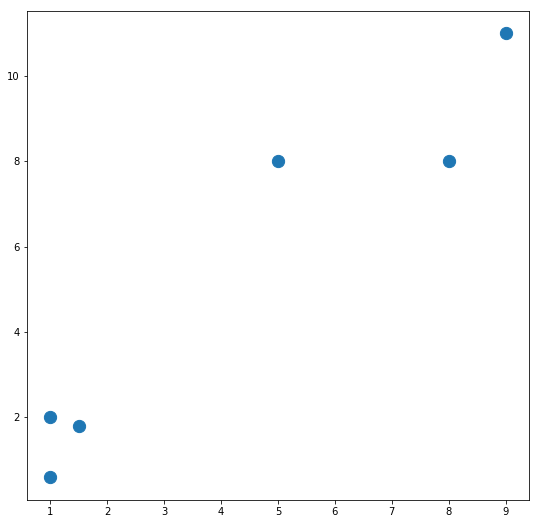

In [826]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()
colors = 10*["g","r","c","b","k"]

In [827]:
class K_Means:
    
    def __init__(self, n_clusters=2, tol=0.001, max_iter=300):
        self.k = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        self.steps = []
        
    def fit(self, data):
        self.centroids = {key:data[i] for key, i in enumerate(np.random.randint(0, len(data), size=self.k))}
                                                           
        for i in range(self.max_iter):
            self.classification = defaultdict(list)
            
            for featureset in data:
                distances = {np.linalg.norm(featureset - coord):centroid
                             for centroid, coord in self.centroids.items()}
                classification = distances[min(distances)]
                self.classification[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for class_, points in self.classification.items():
                self.centroids[class_] = np.average(points, axis=0)
            
            optimized = True
            
            for old, new in zip(prev_centroids.values(), self.centroids.values()):
                if np.sum(abs(new - old) / old * 100) > self.tol:
                    optimized = False
                    break
            
            self.steps.append((prev_centroids, self.classification))
            
            if optimized:
                break
                
    def predict(self, data):
        distances = {np.linalg.norm(data - centroid):class_ for class_, centroid in self.centroids.items()}
        return distances[min(distances)]
    
    def visualize(self):
        if len(list(self.classification.values())[0][0]) != 2:
            print('Your data have to be 2 Dimensional to be plotted')
            return
        
        fig, ax = plt.subplots()
        
        for centroid in self.centroids.values():
            x, y = centroid
            ax.scatter(x, y, marker='x', color='k', s=200)

        for class_, points in self.classification.items():
            color = colors[class_]
            points = np.array(points)
            x, y = points.T
            ax.scatter(x, y, marker='o', color=color, s=150)

## Final Result

1

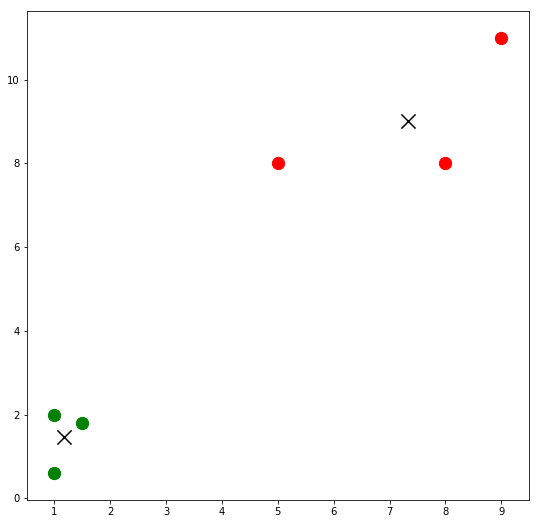

In [828]:
clf = K_Means()
clf.fit(X)
clf.visualize()
clf.predict([8,9])

## Evolution of Centroids

In [829]:
def animate(i, steps):
    ax.cla()
    
    centroids, classification = steps[i]
    
    ax.set_xlim(x_min - x_margin, x_max + x_margin)
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    
    for centroid in centroids.values():
        x, y = centroid
        ax.scatter(x, y, marker='x', color='k', s=200)

    for class_, points in classification.items():
        color = colors[class_]
        points = np.array(points)
        x, y = points.T
        ax.scatter(x, y, marker='o', color=color, s=150)
    return []
    

fig, ax = plt.subplots()

clf = K_Means()
clf.fit(X)
xs = X[:, 0]
ys = X[:, 1]
x_max, x_min = max(xs), min(xs)
x_margin = 0.1 * x_max
y_max, y_min = max(ys), min(ys)
y_margin = 0.1 * y_max

steps = clf.steps

anim = animation.FuncAnimation(fig, animate, frames=len(steps), interval=750, blit=True, fargs=(steps,))

plt.close()

HTML(anim.to_html5_video())

# Compare Manual with Sci Kit Learn

In [830]:
df = pd.read_excel('../data/titanic.xls')
df = df.fillna(0)

In [831]:
dropped_columns = ['name', 'survived', 'body', 'ticket', 'home.dest', 'cabin']

text_columns = [col for col in df.columns if df[col].dtype not in [np.int64, np.float64]]
dummy_columns = [col for col in text_columns if col not in dropped_columns]

In [832]:
X_df = df.drop(dropped_columns, 1)
X_df = pd.get_dummies(X_df, columns=dummy_columns, drop_first=True)

X = np.array(X_df).astype(float)
X = preprocessing.scale(X)

y = np.array(df['survived']).reshape(-1, 1)

## Comparing Speed

### Sci-Kit Learn

In [833]:
%timeit KMeans_process(X, y)

446 ms ± 34.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Manual 

In [834]:
%timeit KMeans_process(X, y, call=K_Means )

95.3 ms ± 9.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Comparing Accuracy

In [836]:
KMeans_process(X, y)

0.7188693659281895

In [835]:
KMeans_process(X, y, call=K_Means)

0.6455309396485867

In [837]:
acc_sklearn = KMeans_process(X, y)
acc_manual = KMeans_process(X, y, call=K_Means)
print(f'One Shot Accuracy Manual KMeans: {round(acc_manual * 100, 2)}%')
print(f'One Shot Accuracy SKlearn KMeans: {round(acc_sklearn * 100, 2)}%')

better = 0
n = 20
for i in range(n):
    acc_sklearn = KMeans_process(X, y)
    acc_manual = KMeans_process(X, y, call=K_Means)
    better += (acc_manual - acc_sklearn) / acc_sklearn
print(f'The manual KMeans was {round(better*100/n, 2)}% better than SKLearn')

One Shot Accuracy Manual KMeans: 62.57%
One Shot Accuracy SKlearn KMeans: 72.73%
The manual KMeans was -6.1% better than SKLearn
